Данные представлены на конкретную дату и время: 13 мая 2023 года 15:14:58. Мы же предположим что активность пользователей представлена в разрезе часа. И уже исходя из этого проведем анализ.

In [1208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [1209]:
comments=pd.read_csv('comments.csv')
follows=pd.read_csv('follows.csv')
likes=pd.read_csv('likes.csv')
photo_tags=pd.read_csv('photo_tags.csv')
photos=pd.read_csv('photos.csv')
tags=pd.read_csv('tags.csv')
users=pd.read_csv('users_inst.csv')

In [1210]:
display(comments)

,id,comment_text,user_id,photo_id,created_at
0,1,unde at dolorem,2,1,2023-05-13 15:14:58
1,2,quae ea ducimus,3,1,2023-05-13 15:14:58
2,3,alias a voluptatum,5,1,2023-05-13 15:14:58
3,4,facere suscipit sunt,14,1,2023-05-13 15:14:58
4,5,totam eligendi quaerat,17,1,2023-05-13 15:14:58
...,...,...,...,...,...
995,996,recusandae magnam ut,24,35,2023-05-13 15:14:58
996,997,incidunt qui blanditiis,27,35,2023-05-13 15:14:58
997,998,dolorem dolor sed,30,35,2023-05-13 15:14:58
998,999,dicta aut non,32,35,2023-05-13 15:14:58


In [1211]:
display(follows)

,follower_id,followee_id,created_at
0,2,1,2023-05-13 15:14:58
1,2,3,2023-05-13 15:14:58
2,2,4,2023-05-13 15:14:58
3,2,5,2023-05-13 15:14:58
4,2,6,2023-05-13 15:14:58
...,...,...,...
995,13,6,2023-05-13 15:14:58
996,13,7,2023-05-13 15:14:58
997,13,8,2023-05-13 15:14:58
998,13,9,2023-05-13 15:14:58


In [1212]:
display(likes)

,user_id,photo_id,created_at
0,2,1,2023-05-13 15:14:58
1,2,4,2023-05-13 15:14:58
2,2,8,2023-05-13 15:14:58
3,2,9,2023-05-13 15:14:58
4,2,10,2023-05-13 15:14:58
...,...,...,...
995,12,174,2023-05-13 15:14:58
996,12,177,2023-05-13 15:14:58
997,12,187,2023-05-13 15:14:58
998,12,192,2023-05-13 15:14:58


In [1213]:
display(photo_tags)

,photo_id,tag_id
0,14,1
1,21,1
2,45,1
3,75,1
4,83,1
...,...,...
496,221,21
497,226,21
498,230,21
499,232,21


In [1214]:
display(photos)

,id,image_url,user_id,created_dat
0,1,http://elijah.biz,1,2023-05-13 15:14:58
1,2,https://shanon.org,1,2023-05-13 15:14:58
2,3,http://vicky.biz,1,2023-05-13 15:14:58
3,4,http://oleta.net,1,2023-05-13 15:14:58
4,5,https://jennings.biz,1,2023-05-13 15:14:58
...,...,...,...,...
252,253,http://ryleigh.info,99,2023-05-13 15:14:58
253,254,https://darien.name,99,2023-05-13 15:14:58
254,255,https://xzavier.org,99,2023-05-13 15:14:58
255,256,https://kaela.name,100,2023-05-13 15:14:58


In [1215]:
display(tags)

,id,tag_name,created_at
0,1,sunset,2023-05-13 15:14:58
1,2,photography,2023-05-13 15:14:58
2,3,sunrise,2023-05-13 15:14:58
3,4,landscape,2023-05-13 15:14:58
4,5,food,2023-05-13 15:14:58
5,6,foodie,2023-05-13 15:14:58
6,7,delicious,2023-05-13 15:14:58
7,8,beauty,2023-05-13 15:14:58
8,9,stunning,2023-05-13 15:14:58
9,10,dreamy,2023-05-13 15:14:58


In [1216]:
display(users)

,id,username,created_at
0,1,Kenton_Kirlin,2017-02-16 18:22:11
1,2,Andre_Purdy85,2017-04-02 17:11:21
2,3,Harley_Lind18,2017-02-21 11:12:33
3,4,Arely_Bogan63,2016-08-13 01:28:43
4,5,Aniya_Hackett,2016-12-07 01:04:39
...,...,...,...
95,96,Keenan.Schamberger60,2016-08-28 14:57:28
96,97,Tomas.Beatty93,2017-02-11 11:38:55
97,98,Imani_Nicolas17,2017-01-31 22:59:34
98,99,Alek_Watsica,2016-12-10 07:43:58


## Комментари
Посмотрим как активно пользователи оставляют комменарии

In [1217]:
user_comments=comments.groupby('user_id').agg({'comment_text':'count'})
user_comments.reset_index(inplace= True )
user_comments

,user_id,comment_text
0,2,7
1,3,8
2,4,6
3,5,35
4,6,6
...,...,...
72,96,8
73,97,15
74,98,14
75,99,10


Мы видим, что 13 пользователей оставляют значительно больше комментариев чем все остальные. 

In [1218]:
user_comments.sort_values('comment_text',ascending=False).head(13)

,user_id,comment_text
3,5,35
11,14,35
29,36,35
20,24,35
18,21,35
46,57,34
52,66,34
43,54,34
56,71,34
67,91,34


Это хорошо видно на графике. Пики таких пользователей сильно выделяются. 

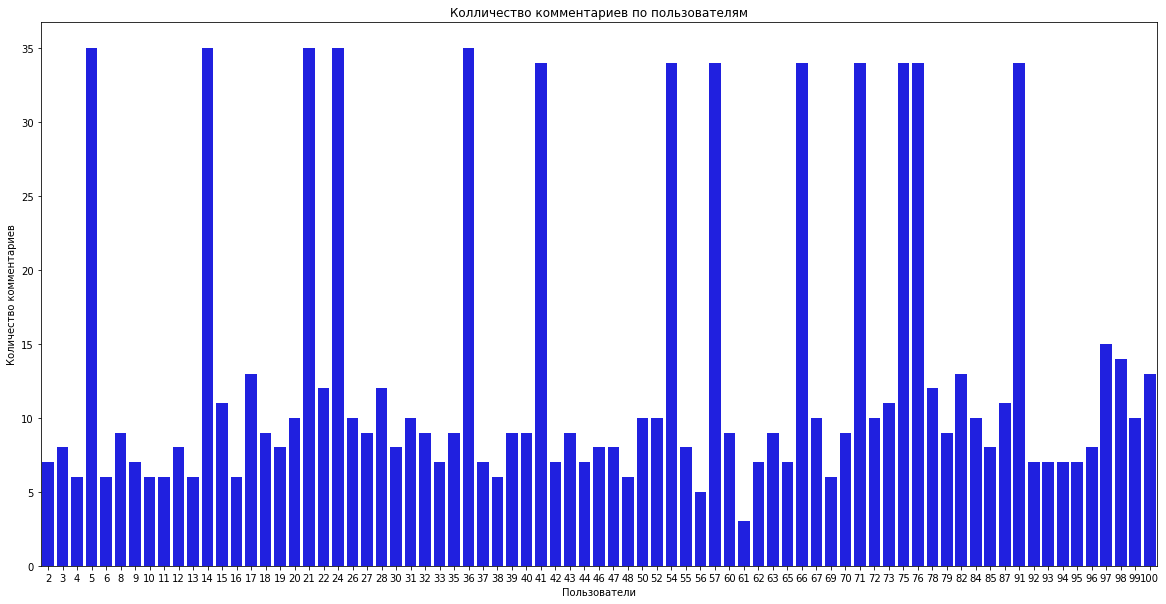

In [1219]:
plt.figure(figsize=(20, 10))
sns.barplot(
    x='user_id', 
    y='comment_text', 
    data=user_comments,
    color='blue')
plt.title('Колличество комментариев по пользователям')
plt.ylabel('Количество комментариев')
plt.xlabel('Пользователи')
plt.show()

Посмотрим сколько же в среднем приходится коментариев на пользователей. В среднем на пользователя приходится 12.99 комментария. Но не стоит забывать, что у нас есть 13 пользователей с сильно завышенным показателем количества комментариев.

In [1220]:
user_comments['comment_text'].mean()

12.987012987012987

Тут хорошо бы взглянуть на медиану. Показатель сразу становится ниже. 9 сообщений на пользователя.

In [1221]:
user_comments['comment_text'].median()

9.0

## Фолловеры
Посмотрим сколько подписчиков в среднем подписались на пользователей

In [1222]:
follows

,follower_id,followee_id,created_at
0,2,1,2023-05-13 15:14:58
1,2,3,2023-05-13 15:14:58
2,2,4,2023-05-13 15:14:58
3,2,5,2023-05-13 15:14:58
4,2,6,2023-05-13 15:14:58
...,...,...,...
995,13,6,2023-05-13 15:14:58
996,13,7,2023-05-13 15:14:58
997,13,8,2023-05-13 15:14:58
998,13,9,2023-05-13 15:14:58


In [1223]:
user_follower=follows.groupby('followee_id').agg({'follower_id':'count'})
user_follower.reset_index(inplace= True )
user_follower

,followee_id,follower_id
0,1,11
1,2,10
2,3,10
3,4,10
4,5,10
...,...,...
95,96,10
96,97,10
97,98,10
98,99,10


Взглянем на график. Видим что в основном на каждого пользователя подписались 10 фолловеров. Но есть два пользователя у которых 11 подписавшихся. И два пользователя с 9 подписавшимися.

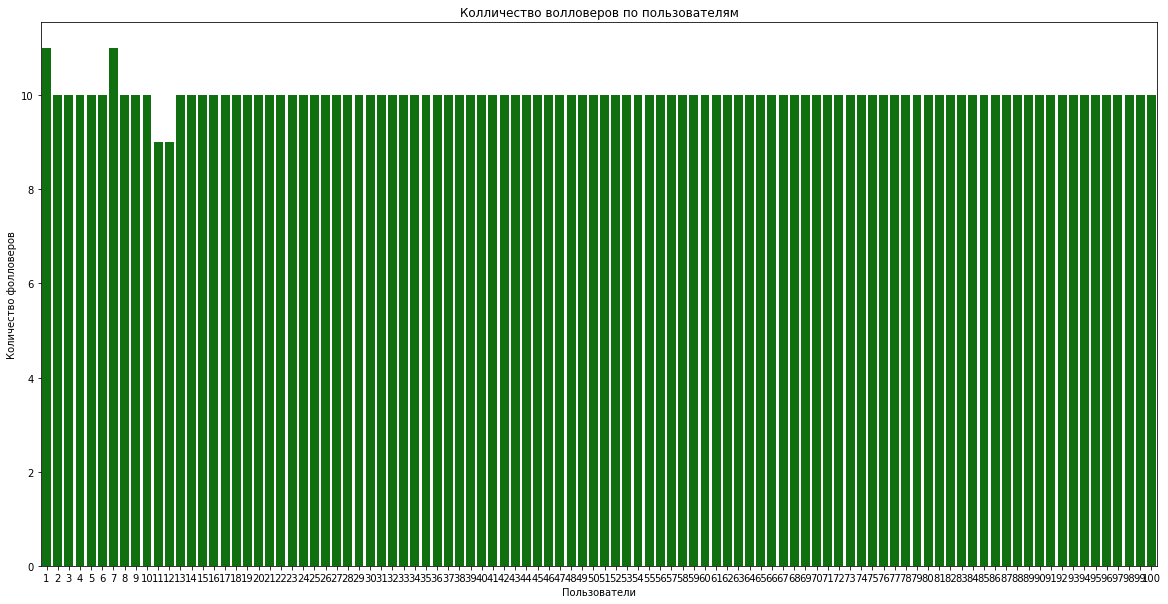

In [1224]:
plt.figure(figsize=(20, 10))
sns.barplot(
    x='followee_id', 
    y='follower_id', 
    data=user_follower,
    color='green')
plt.title('Колличество волловеров по пользователям')
plt.ylabel('Количество фолловеров')
plt.xlabel('Пользователи')
plt.show()

Взглянем на данные с другой стороны. Мы видим что всего 11 пользователей подписались на 1000 других пользователей. 

In [1225]:
user_followee=follows.groupby('follower_id').agg({'followee_id':'count'})
user_followee.reset_index(inplace= True )
user_followee

,follower_id,followee_id
0,2,99
1,3,99
2,4,99
3,5,99
4,6,99
5,8,99
6,9,99
7,10,99
8,11,99
9,12,99


## Лайки

In [1226]:
likes

,user_id,photo_id,created_at
0,2,1,2023-05-13 15:14:58
1,2,4,2023-05-13 15:14:58
2,2,8,2023-05-13 15:14:58
3,2,9,2023-05-13 15:14:58
4,2,10,2023-05-13 15:14:58
...,...,...,...
995,12,174,2023-05-13 15:14:58
996,12,177,2023-05-13 15:14:58
997,12,187,2023-05-13 15:14:58
998,12,192,2023-05-13 15:14:58


Активнее всего был пользователь id 5. Он поставил значительно больше лайков чем все остальные. Всего ставили лайки 9 пользователей.

In [1227]:
user_likes=likes.groupby('user_id').agg({'photo_id':'count'})
user_likes.reset_index(inplace= True )
user_likes

,user_id,photo_id
0,2,94
1,3,79
2,4,93
3,5,257
4,6,82
5,8,79
6,9,85
7,10,87
8,11,89
9,12,55


Аномальные значения по пользователю 5 хорошо видны на графике.

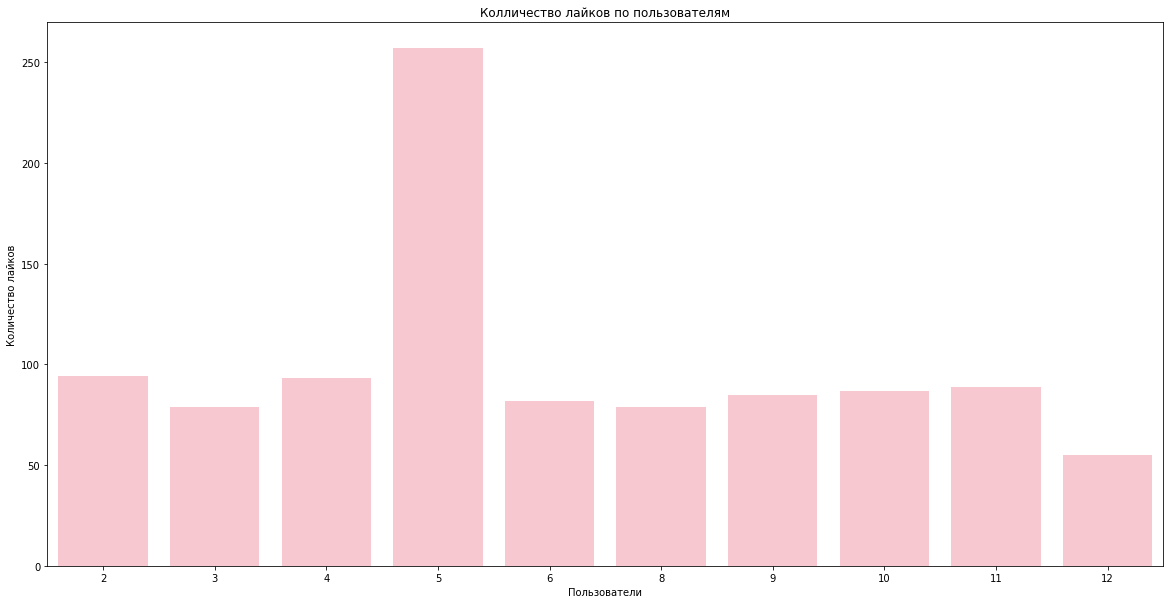

In [1228]:
plt.figure(figsize=(20, 10))
sns.barplot(
    x='user_id', 
    y='photo_id', 
    data=user_likes,
    color='pink')
plt.title('Колличество лайков по пользователям')
plt.ylabel('Количество лайков')
plt.xlabel('Пользователи')
plt.show()

Интересное наблюдение, что пользователи ставившие лайки это те же пользователи что и совершали подписки на других пользователей.

In [1229]:
fol_like=user_followee.merge(user_likes,how='left',left_on='follower_id',right_on='user_id')
fol_like

,follower_id,followee_id,user_id,photo_id
0,2,99,2.0,94.0
1,3,99,3.0,79.0
2,4,99,4.0,93.0
3,5,99,5.0,257.0
4,6,99,6.0,82.0
5,8,99,8.0,79.0
6,9,99,9.0,85.0
7,10,99,10.0,87.0
8,11,99,11.0,89.0
9,12,99,12.0,55.0


## Фото и теги
Посмотрим сколько тегов обычно пишут к публикуемым фото

Чаще всего пишут 3 тега. чуть реже 1 тег. Больше 5 тегов не указано ни к одному фото.

In [1230]:
photo_tags

,photo_id,tag_id
0,14,1
1,21,1
2,45,1
3,75,1
4,83,1
...,...,...
496,221,21
497,226,21
498,230,21
499,232,21


In [1231]:
count_tags=photo_tags.groupby('photo_id').agg({'tag_id':'count'})
count_tags.reset_index(inplace= True )
count_tags_1=count_tags.groupby('tag_id').agg({'photo_id':'count'})
count_tags_1.reset_index(inplace= True )
display(count_tags)
display(count_tags_1)

,photo_id,tag_id
0,1,5
1,2,4
2,3,1
3,4,4
4,5,4
...,...,...
185,250,3
186,251,1
187,253,1
188,254,4


,tag_id,photo_id
0,1,47
1,2,43
2,3,50
3,4,32
4,5,18


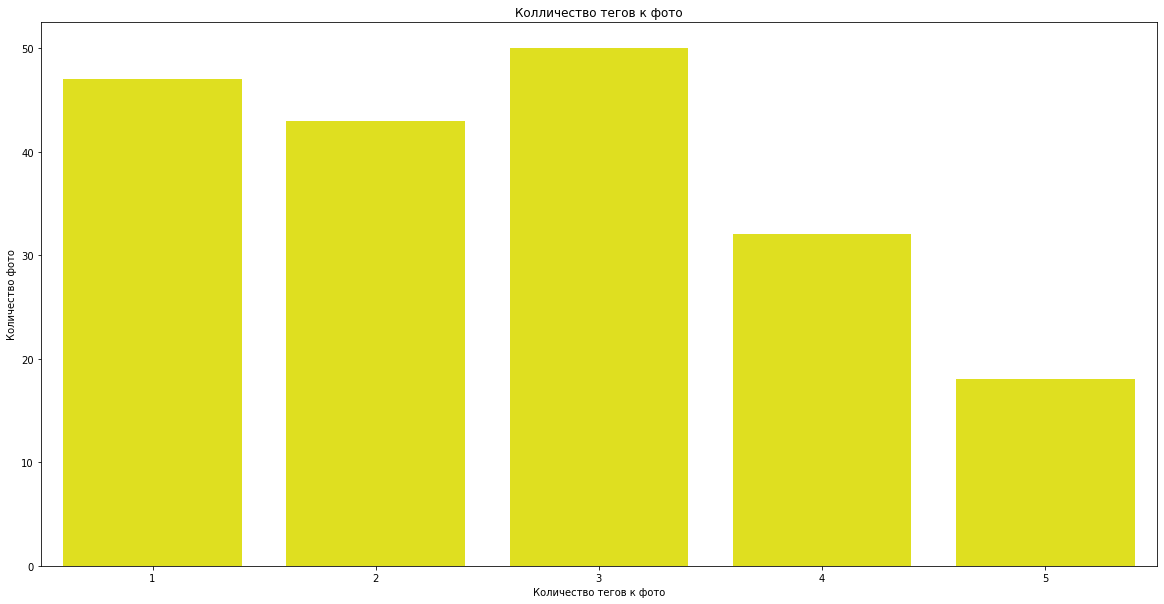

In [1232]:
plt.figure(figsize=(20, 10))
sns.barplot(
    x='tag_id', 
    y='photo_id', 
    data=count_tags_1,
    color='yellow')
plt.title('Колличество тегов к фото')
plt.ylabel('Количество фото')
plt.xlabel('Количество тегов к фото')
plt.show()

Проанализируем самые популярные теги. Присоединив таблицу с наименованиями тегов, мы сразу видим что чаще всего используется тег "smile". 

In [1233]:
popular_tags=photo_tags.groupby('tag_id').agg({'photo_id':'count'})
popular_tags.reset_index(inplace= True )
popular_tags=popular_tags.sort_values('photo_id',ascending=False)
popular_tags=popular_tags.merge(tags[['tag_name','id']],how='left', left_on='tag_id', right_on='id')
popular_tags

,tag_id,photo_id,tag_name,id
0,21,59,smile,21
1,20,42,beach,20
2,17,39,party,17
3,13,38,fun,13
4,18,24,concert,18
5,11,24,lol,11
6,5,24,food,5
7,15,23,hair,15
8,12,22,happy,12
9,8,20,beauty,8


 Хорошо видна популярность различных тегов на графике.

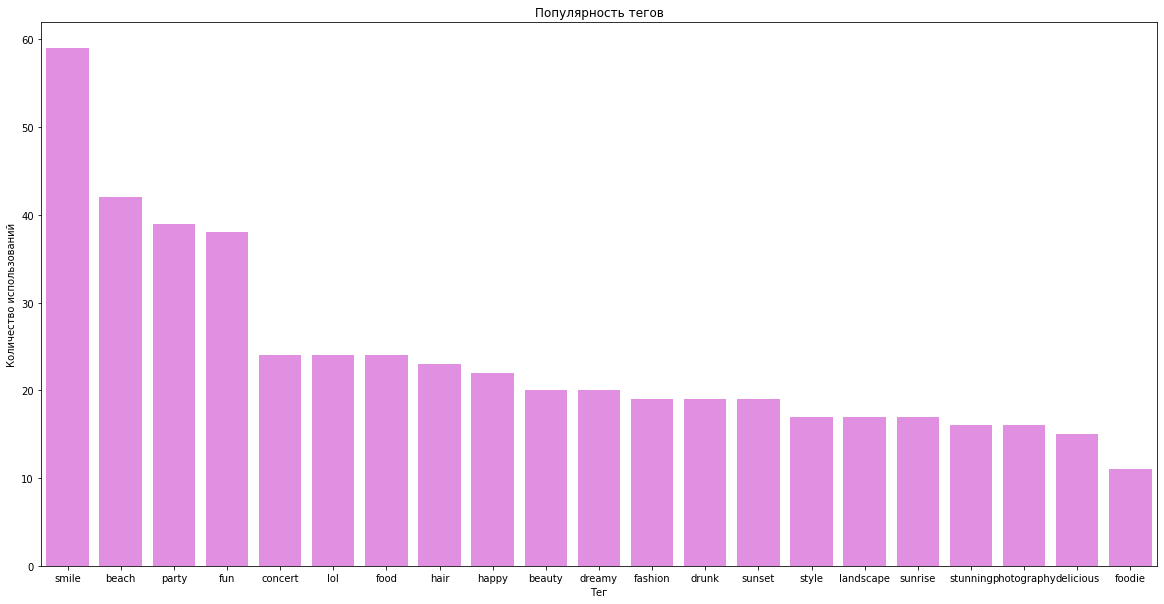

In [1234]:
plt.figure(figsize=(20, 10))
sns.barplot(
    x='tag_name', 
    y='photo_id', 
    data=popular_tags,
    color='violet')
plt.title('Популярность тегов')
plt.ylabel('Количество использований')
plt.xlabel('Тег')
plt.show()

## Фото
Посмотрим как активно пользователи публикуют фото

In [1235]:
photos

,id,image_url,user_id,created_dat
0,1,http://elijah.biz,1,2023-05-13 15:14:58
1,2,https://shanon.org,1,2023-05-13 15:14:58
2,3,http://vicky.biz,1,2023-05-13 15:14:58
3,4,http://oleta.net,1,2023-05-13 15:14:58
4,5,https://jennings.biz,1,2023-05-13 15:14:58
...,...,...,...,...
252,253,http://ryleigh.info,99,2023-05-13 15:14:58
253,254,https://darien.name,99,2023-05-13 15:14:58
254,255,https://xzavier.org,99,2023-05-13 15:14:58
255,256,https://kaela.name,100,2023-05-13 15:14:58


In [1236]:
user_photo=photos.groupby('user_id').agg({'id':'count'})
user_photo.reset_index(inplace= True )
user_photo

,user_id,id
0,1,5
1,2,4
2,3,4
3,4,3
4,6,5
...,...,...
69,96,3
70,97,2
71,98,1
72,99,3


Мы снова видим что среди всех пользователей есть те, кто значительно выделяется. Если в большинстве своем показатель не превышает 5 фото, то у некоторых он достигает 10-12.

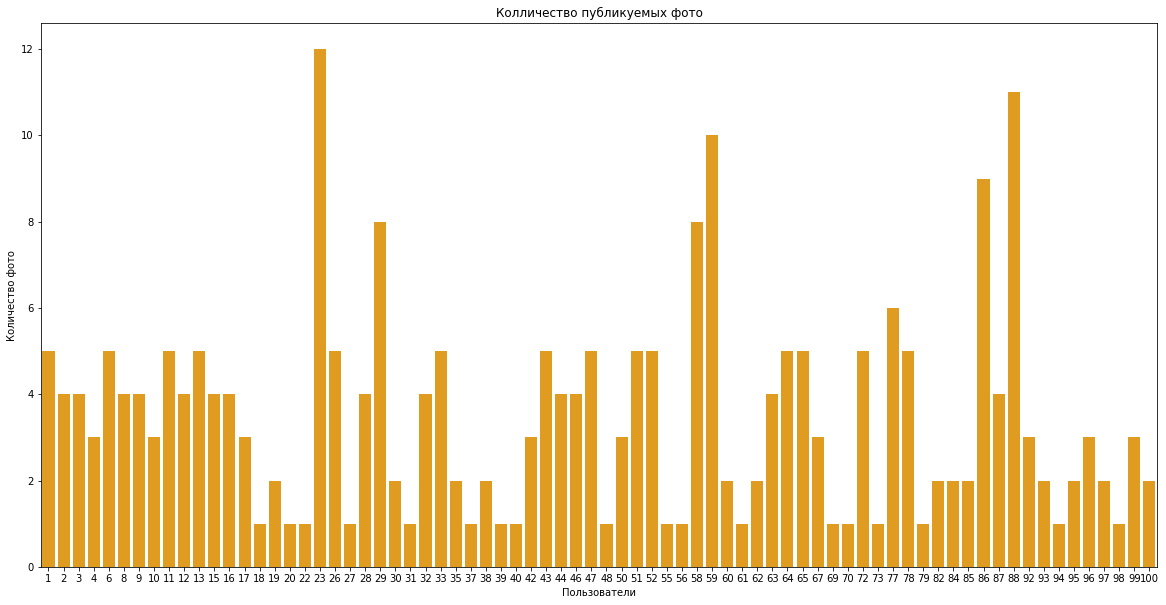

In [1237]:
plt.figure(figsize=(20, 10))
sns.barplot(
    x='user_id', 
    y='id', 
    data=user_photo,
    color='orange')
plt.title('Колличество публикуемых фото')
plt.ylabel('Количество фото')
plt.xlabel('Пользователи')
plt.show()

Средний пользователь публикует около 3,47 фото.

In [1238]:
user_photo['id'].mean()

3.472972972972973

## Пользователи

In [1239]:
users=users.merge(user_comments,how='left',left_on='id',right_on='user_id')
users=users.drop(['user_id'],axis=1)
users=users.merge(user_follower,how='left',left_on='id',right_on='followee_id')
users=users.drop(['followee_id'],axis=1)
users=users.merge(user_followee,how='left',left_on='id',right_on='follower_id')
users=users.drop(['follower_id_y'],axis=1)
users=users.merge(user_likes,how='left',left_on='id',right_on='user_id')
users=users.drop(['user_id'],axis=1)
users=users.merge(user_photo,how='left',left_on='id',right_on='user_id')
users=users.drop(['user_id'],axis=1)

In [1240]:
users

,id_x,username,created_at,comment_text,follower_id_x,followee_id,photo_id,id_y
0,1,Kenton_Kirlin,2017-02-16 18:22:11,NaN,11,NaN,NaN,5.0
1,2,Andre_Purdy85,2017-04-02 17:11:21,7.0,10,99.0,94.0,4.0
2,3,Harley_Lind18,2017-02-21 11:12:33,8.0,10,99.0,79.0,4.0
3,4,Arely_Bogan63,2016-08-13 01:28:43,6.0,10,99.0,93.0,3.0
4,5,Aniya_Hackett,2016-12-07 01:04:39,35.0,10,99.0,257.0,NaN
...,...,...,...,...,...,...,...,...
95,96,Keenan.Schamberger60,2016-08-28 14:57:28,8.0,10,NaN,NaN,3.0
96,97,Tomas.Beatty93,2017-02-11 11:38:55,15.0,10,NaN,NaN,2.0
97,98,Imani_Nicolas17,2017-01-31 22:59:34,14.0,10,NaN,NaN,1.0
98,99,Alek_Watsica,2016-12-10 07:43:58,10.0,10,NaN,NaN,3.0


In [1241]:
users.rename(columns = {'id_x':'user_id', 'comment_text':'count_comment','follower_id_x':'count_follower','followee_id':'count_followee','photo_id':'count_like','id_y':'count_photo'}, inplace = True )

In [1242]:
users

,user_id,username,created_at,count_comment,count_follower,count_followee,count_like,count_photo
0,1,Kenton_Kirlin,2017-02-16 18:22:11,NaN,11,NaN,NaN,5.0
1,2,Andre_Purdy85,2017-04-02 17:11:21,7.0,10,99.0,94.0,4.0
2,3,Harley_Lind18,2017-02-21 11:12:33,8.0,10,99.0,79.0,4.0
3,4,Arely_Bogan63,2016-08-13 01:28:43,6.0,10,99.0,93.0,3.0
4,5,Aniya_Hackett,2016-12-07 01:04:39,35.0,10,99.0,257.0,NaN
...,...,...,...,...,...,...,...,...
95,96,Keenan.Schamberger60,2016-08-28 14:57:28,8.0,10,NaN,NaN,3.0
96,97,Tomas.Beatty93,2017-02-11 11:38:55,15.0,10,NaN,NaN,2.0
97,98,Imani_Nicolas17,2017-01-31 22:59:34,14.0,10,NaN,NaN,1.0
98,99,Alek_Watsica,2016-12-10 07:43:58,10.0,10,NaN,NaN,3.0


In [1243]:
users[['count_comment', 'count_follower','count_followee','count_like','count_photo']] = users[['count_comment', 'count_follower','count_followee','count_like','count_photo']]. fillna (0)

In [1244]:
users=users.astype({'count_comment':np.int_,'count_followee':np.int_,'count_like':np.int_,'count_photo':np.int_})

Посмотрим год регистрации пользователей. У нас представлены пользователи зарегистрированные в 2016 и 2017 годах.

In [1245]:
users['created_at']=pd.to_datetime(users['created_at']).dt.date
users['created_at']=pd.to_datetime(users['created_at'])
users['created_at']=users['created_at'].dt.year

In [1246]:
users

,user_id,username,created_at,count_comment,count_follower,count_followee,count_like,count_photo
0,1,Kenton_Kirlin,2017,0,11,0,0,5
1,2,Andre_Purdy85,2017,7,10,99,94,4
2,3,Harley_Lind18,2017,8,10,99,79,4
3,4,Arely_Bogan63,2016,6,10,99,93,3
4,5,Aniya_Hackett,2016,35,10,99,257,0
...,...,...,...,...,...,...,...,...
95,96,Keenan.Schamberger60,2016,8,10,0,0,3
96,97,Tomas.Beatty93,2017,15,10,0,0,2
97,98,Imani_Nicolas17,2017,14,10,0,0,1
98,99,Alek_Watsica,2016,10,10,0,0,3


Посмотрим на распределения разных показателей.

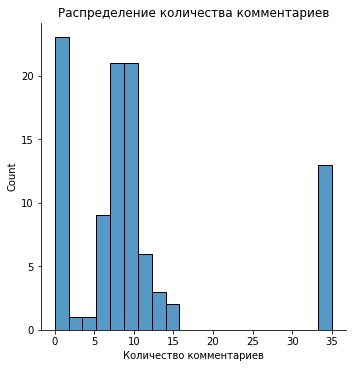

In [1247]:
sns.displot(users['count_comment'])
plt.title('Распределение количества комментариев')
plt.xlabel('Количество комментариев')
plt.show()

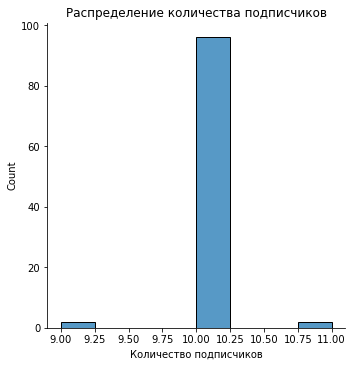

In [1248]:
sns.displot(users['count_follower'])
plt.title('Распределение количества подписчиков')
plt.xlabel('Количество подписчиков')
plt.show()

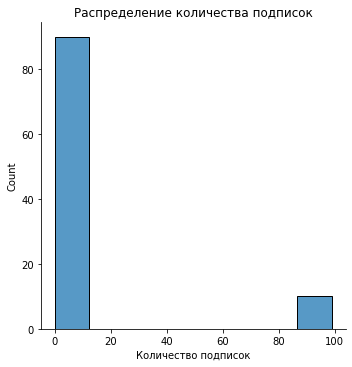

In [1249]:
sns.displot(users['count_followee'])
plt.title('Распределение количества подписок')
plt.xlabel('Количество подписок')
plt.show()

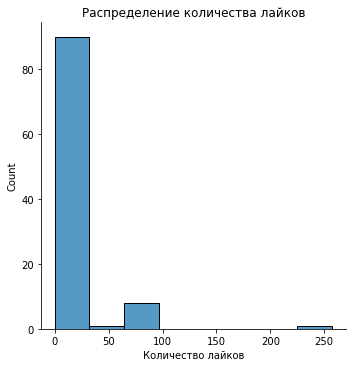

In [1250]:
sns.displot(users['count_like'])
plt.title('Распределение количества лайков')
plt.xlabel('Количество лайков')
plt.show()

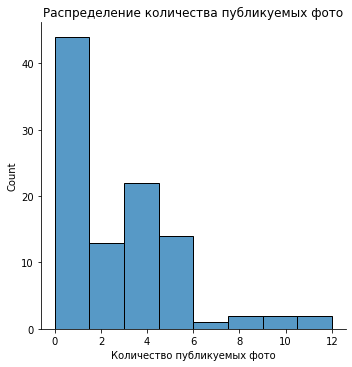

In [1251]:
sns.displot(users['count_photo'])
plt.title('Распределение количества публикуемых фото')
plt.xlabel('Количество публикуемых фото')
plt.show()

Посмотрим зависимость между различными показателями. Для этого построим корреляции.

In [1252]:
corr=users.corr()
corr

,user_id,created_at,count_comment,count_follower,count_followee,count_like,count_photo
user_id,1.000000,-0.032321,-0.029156,-0.025982,-0.506979,-0.443037,-0.109957
created_at,-0.032321,1.000000,-0.034799,-0.104828,0.109478,0.029846,0.049429
count_comment,-0.029156,-0.034799,1.000000,-0.068346,-0.007828,0.117348,-0.396840
count_follower,-0.025982,-0.104828,-0.068346,1.000000,-0.333521,-0.209175,-0.077938
count_followee,-0.506979,0.109478,-0.007828,-0.333521,1.000000,0.871074,0.137059
count_like,-0.443037,0.029846,0.117348,-0.209175,0.871074,1.000000,0.044493
count_photo,-0.109957,0.049429,-0.396840,-0.077938,0.137059,0.044493,1.000000


Для нагляднности построим тепловую карту. Мы видим сильную положительную связь сежду количеством ставимых лайков и количеством подписок. Так же слабая положительная связь наблюдается между количеством ставимых лайков и количеством оставляемых комментариев, между количеством выкладываемых фото и количеством подписок.

Умеренная отрицательная связь количеством выкладываемых фото и количеством оставляемых комментариев, количеством подписок и количеством подписчиков. Слабая отрицательная связь между количеством подписок и количеством комментариев, количеством подписчиков и количеством комментариев, количеством подписчиков и количеством выкладываемых фото, количеством лайков и количеством подписчиков.

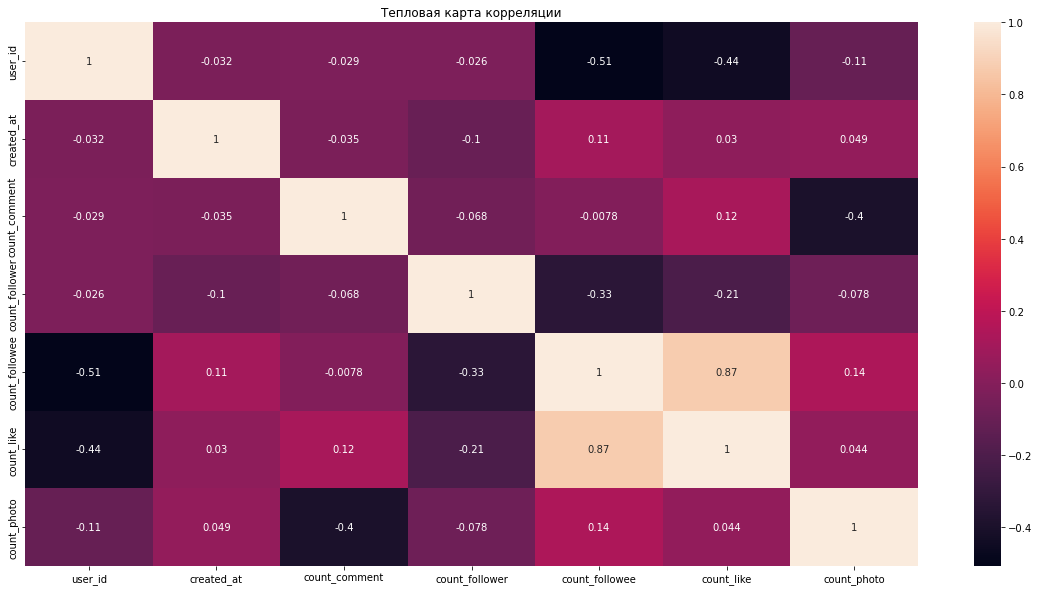

In [1253]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True) 
plt.title('Тепловая карта корреляции')
plt.show()

Посмотрим как активность пользователей зависит от года регистрации.

Мы видим что пользователи зарегистрированные в 2016 году чуть охотнее комментируют и у них чуть больше подписчиков. Пользователи зарегистрированные в 2017 году чаше подписываются и ставят лайки. 

In [1254]:
year=users.groupby('created_at').agg({'user_id':'count','count_comment':'mean','count_follower':'mean','count_followee':'mean','count_like':'mean','count_photo':'mean'})
year.reset_index( inplace= True )
year=year.drop(['user_id'],axis=1)
year

,created_at,count_comment,count_follower,count_followee,count_like,count_photo
0,2016,10.261538,10.015385,7.615385,9.246154,2.476923
1,2017,9.514286,9.971429,14.428571,11.400000,2.742857


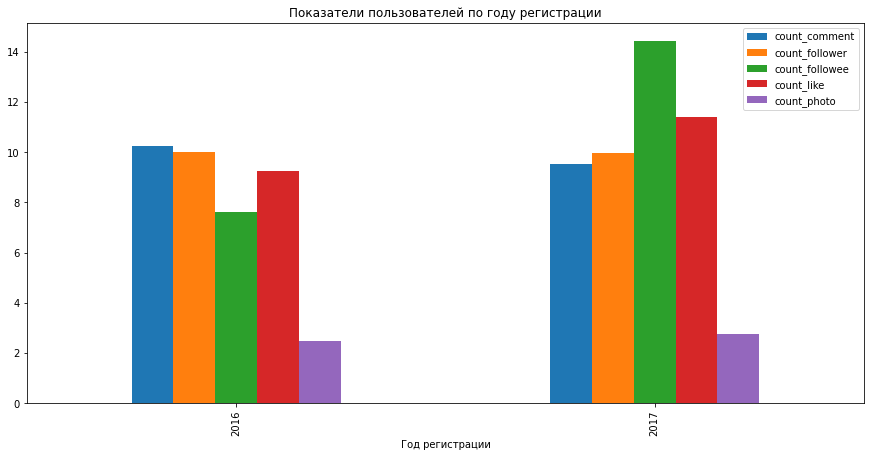

In [1255]:
year.plot.bar(x='created_at',title='Показатели пользователей по году регистрации',figsize=(15, 7))
plt.xlabel('Год регистрации')
plt.show()

In [1256]:
display(users)

,user_id,username,created_at,count_comment,count_follower,count_followee,count_like,count_photo
0,1,Kenton_Kirlin,2017,0,11,0,0,5
1,2,Andre_Purdy85,2017,7,10,99,94,4
2,3,Harley_Lind18,2017,8,10,99,79,4
3,4,Arely_Bogan63,2016,6,10,99,93,3
4,5,Aniya_Hackett,2016,35,10,99,257,0
...,...,...,...,...,...,...,...,...
95,96,Keenan.Schamberger60,2016,8,10,0,0,3
96,97,Tomas.Beatty93,2017,15,10,0,0,2
97,98,Imani_Nicolas17,2017,14,10,0,0,1
98,99,Alek_Watsica,2016,10,10,0,0,3


Интересно сколько в среднем каждый пользователь делает публикаций фото, комментариев и лайков. Из-за выборосов в лайках, посмотрим тук же на медиану этого показателя.

In [1257]:
print('Среднее количество комментариев на пользователя:',users['count_comment'].mean())
print('Среднее количество лайков на пользователя:',users['count_like'].mean())
print('Медиана количество лайков на пользователя:',users['count_like'].median())
print('Среднее количество публикуемых фото на пользователя:',users['count_photo'].mean())

Среднее количество комментариев на пользователя: 10.0
Среднее количество лайков на пользователя: 10.0
Медиана количество лайков на пользователя: 0.0
Среднее количество публикуемых фото на пользователя: 2.57


Вспомним что у нас было несколько пользователей, у которых количество комментариев было значительно выше чем у остальных. Посмотрим теперь на этих пользователей. Мы сразу видим как выделяется пользователь 5. Кроме того что у него высокая активность по комментариям, он так же активно подписывается и ставит лайки. Можно предположить что это бот.

In [1258]:
user_com=users.query('count_comment>=35')
user_com

,user_id,username,created_at,count_comment,count_follower,count_followee,count_like,count_photo
4,5,Aniya_Hackett,2016,35,10,99,257,0
13,14,Jaclyn81,2017,35,10,0,0,0
20,21,Rocio33,2017,35,10,0,0,0
23,24,Maxwell.Halvorson,2017,35,10,0,0,0
35,36,Ollie_Ledner37,2016,35,10,0,0,0


Так как пользователь с id 5 может исказить дальнейшее исследование из-за больших выбросов, Избавимся от него

In [1259]:
users=users.query('user_id!=5')
users

,user_id,username,created_at,count_comment,count_follower,count_followee,count_like,count_photo
0,1,Kenton_Kirlin,2017,0,11,0,0,5
1,2,Andre_Purdy85,2017,7,10,99,94,4
2,3,Harley_Lind18,2017,8,10,99,79,4
3,4,Arely_Bogan63,2016,6,10,99,93,3
5,6,Travon.Waters,2017,6,10,99,82,5
...,...,...,...,...,...,...,...,...
95,96,Keenan.Schamberger60,2016,8,10,0,0,3
96,97,Tomas.Beatty93,2017,15,10,0,0,2
97,98,Imani_Nicolas17,2017,14,10,0,0,1
98,99,Alek_Watsica,2016,10,10,0,0,3


## Кластеризация

Разделим пользователей на 3 кластера в зависимости от их действий.

In [1260]:
users=users.drop(['username'],axis=1)

In [1261]:
scaler = StandardScaler()
scaler.fit(users)
x_sc = scaler.fit_transform(users)
x_sc

array([[-1.74408653e+00,  1.35224681e+00, -9.76787694e-01,
         4.97493719e+00, -3.19938545e-01, -3.13175550e-01,
         9.36891706e-01],
       [-1.70917659e+00,  1.35224681e+00, -2.75322542e-01,
         0.00000000e+00,  3.16032525e+00,  3.60931660e+00,
         5.47176249e-01],
       [-1.67426665e+00,  1.35224681e+00, -1.75113234e-01,
         0.00000000e+00,  3.16032525e+00,  2.98338700e+00,
         5.47176249e-01],
       [-1.63935671e+00, -7.39509973e-01, -3.75531849e-01,
         0.00000000e+00,  3.16032525e+00,  3.56758796e+00,
         1.57460791e-01],
       [-1.56953682e+00,  1.35224681e+00, -3.75531849e-01,
         0.00000000e+00,  3.16032525e+00,  3.10857292e+00,
         9.36891706e-01],
       [-1.53462688e+00, -7.39509973e-01, -9.76787694e-01,
         4.97493719e+00, -3.19938545e-01, -3.13175550e-01,
        -1.01168558e+00],
       [-1.49971694e+00, -7.39509973e-01, -7.49039268e-02,
         0.00000000e+00,  3.16032525e+00,  2.98338700e+00,
         5.4717624

In [1262]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=0)
labels = km.fit_predict(x_sc)
users['cluster'] =labels
display(users)

,user_id,created_at,count_comment,count_follower,count_followee,count_like,count_photo,cluster
0,1,2017,0,11,0,0,5,1
1,2,2017,7,10,99,94,4,2
2,3,2017,8,10,99,79,4,2
3,4,2016,6,10,99,93,3,2
5,6,2017,6,10,99,82,5,2
...,...,...,...,...,...,...,...,...
95,96,2016,8,10,0,0,3,1
96,97,2017,15,10,0,0,2,1
97,98,2017,14,10,0,0,1,1
98,99,2016,10,10,0,0,3,1


In [1263]:
ab=users.groupby('cluster').agg({'user_id':'count'})
ab.reset_index( inplace= True )
ab

,cluster,user_id
0,0,12
1,1,78
2,2,9


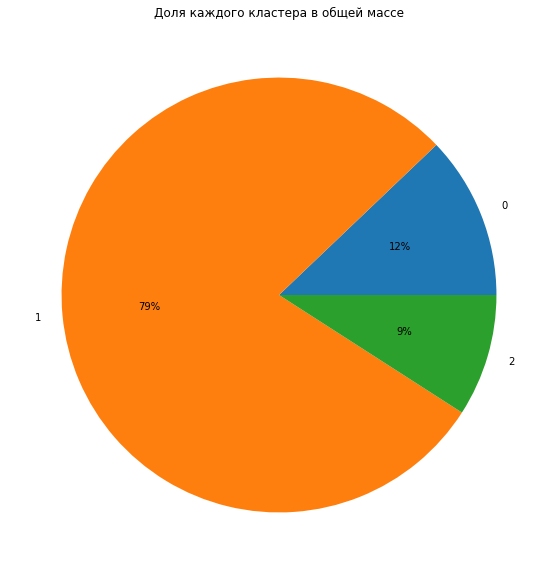

In [1266]:
vals=ab['user_id']
labels=ab['cluster']
plt.figure(figsize=(10, 10))
plt.pie(vals, labels=labels, autopct='%.0f%%')
plt.title('Доля каждого кластера в общей массе')
plt.show()

Теперь рассмотрим каждый кластер детальнее:

Кластер 0

In [1267]:
users0=users.query('cluster==0')
users0

,user_id,created_at,count_comment,count_follower,count_followee,count_like,count_photo,cluster
13,14,2017,35,10,0,0,0,0
20,21,2017,35,10,0,0,0,0
23,24,2017,35,10,0,0,0,0
35,36,2016,35,10,0,0,0,0
40,41,2016,34,10,0,0,0,0
53,54,2016,34,10,0,0,0,0
56,57,2017,34,10,0,0,0,0
65,66,2016,34,10,0,0,0,0
70,71,2016,34,10,0,0,0,0
74,75,2016,34,10,0,0,0,0


In [1268]:
print('Среднее количество комментариев для кластера 0:',users0['count_comment'].mean())
print('Среднее количество подписок для кластера 0:',users0['count_followee'].mean())
print('Среднее количество лайков для кластера 0:',users0['count_like'].mean())
print('Среднее количество публикуемых фото для кластера 0:',users0['count_photo'].mean())

Среднее количество комментариев для кластера 0: 34.333333333333336
Среднее количество подписок для кластера 0: 0.0
Среднее количество лайков для кластера 0: 0.0
Среднее количество публикуемых фото для кластера 0: 0.0


In [1269]:
users1=users.query('cluster==1')
users1

,user_id,created_at,count_comment,count_follower,count_followee,count_like,count_photo,cluster
0,1,2017,0,11,0,0,5,1
6,7,2016,0,11,0,0,0,1
12,13,2017,6,10,10,0,5,1
14,15,2016,11,10,0,0,4,1
15,16,2016,6,10,0,0,4,1
...,...,...,...,...,...,...,...,...
95,96,2016,8,10,0,0,3,1
96,97,2017,15,10,0,0,2,1
97,98,2017,14,10,0,0,1,1
98,99,2016,10,10,0,0,3,1


In [1270]:
print('Среднее количество комментариев для кластера 1:',users1['count_comment'].mean())
print('Среднее количество подписок для кластера 1:',users1['count_followee'].mean())
print('Среднее количество лайков для кластера 1:',users1['count_like'].mean())
print('Среднее количество публикуемых фото для кластера 1:',users1['count_photo'].mean())

Среднее количество комментариев для кластера 1: 6.282051282051282
Среднее количество подписок для кластера 1: 0.1282051282051282
Среднее количество лайков для кластера 1: 0.0
Среднее количество публикуемых фото для кластера 1: 2.8333333333333335


In [1271]:
users2=users.query('cluster==2')
users2

,user_id,created_at,count_comment,count_follower,count_followee,count_like,count_photo,cluster
1,2,2017,7,10,99,94,4,2
2,3,2017,8,10,99,79,4,2
3,4,2016,6,10,99,93,3,2
5,6,2017,6,10,99,82,5,2
7,8,2016,9,10,99,79,4,2
8,9,2016,7,10,99,85,4,2
9,10,2016,6,10,99,87,3,2
10,11,2017,6,9,99,89,5,2
11,12,2017,8,9,99,55,4,2


In [1272]:
print('Среднее количество комментариев для кластера 2:',users2['count_comment'].mean())
print('Среднее количество подписок для кластера 2:',users2['count_followee'].mean())
print('Среднее количество лайков для кластера 2:',users2['count_like'].mean())
print('Среднее количество публикуемых фото для кластера 2:',users2['count_photo'].mean())

Среднее количество комментариев для кластера 2: 7.0
Среднее количество подписок для кластера 2: 99.0
Среднее количество лайков для кластера 2: 82.55555555555556
Среднее количество публикуемых фото для кластера 2: 4.0


Опишем пользователя каждого кластера

#### Кластер 0 (Боты): 
Пользователь данного кластера активно оставляет комментарии, 34 комментария. Других действий пользователь не совершает. Можно предположить что это боты для накрутки комментов или что-то подобное.

#### Кластер 1(Скучающий):
Пользователь средне активный. Он пишет около 6 комментариев, постит 2-3 фотографии. При этом он не лайкает фото и почти не подписывается на других пользователей.

#### Кластер 2(Энерджайзер):
Пользователь кластера 2 самый активный. Он охотно комментирует, оставляя до 7 комментов. Постит по 4 фотографии. И очень активно лайкает, 82 лайка. При этом пользователь кластера 2 много подписывается на других пользователей, 99 подписок.

In [1273]:
users.to_csv ('my_data.csv')